---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

### Preamble

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

* Dummy classifiers completely ignore the input data.
* Dummy classifiers serve as a sanity check on your classifier's performance.
* They provide a null metric (e.g. null accuracy) baseline.
* Dummy classifiers should not be used for real problems.

#### Commonly used settings for the strategy parameter for DummyClassifier in scikit-learn:

* **most_frequent**: predicts the most frequent label in the training set
* **stratified**: random predictions based on training set class distribution
* **uniform**: generates predictions uniformly at random
* **constant**: always predicts a constant label provided by the user
    * A major motivation of this method is F1-scoring, when positive class is in the minority

### Dummy Regressors

#### strategy parameter options:
* **mean**: predicts the mean of the training targets.
* **median**: predicts the median of the training targets.
* **quantile**: predicts a user-provided quantile of the training targets.
* **constant**: predicts a constant user-provided value

### Binary Prediction Outcomes

<img src="assets/bin_class.png" style="width: 700px;"/>

##### False Positive = Type 1 Error
##### False Negative = Type 2 Error


### Confusion matrices

#### Binary (two-class) confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[369  38]
 [ 39   4]]


In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


##### **Accuracy** $= {{TP + TN} \over {TP + TN + FP + FN}}$ -> For what fraction of all instances is the classifier's prediction correct.
##### **Classification Error** $= 1 - Accuracy$ -> For what fraction of all instances is the classifier's prediction incorrect.
##### **Precision** $ = {TP \over {TP + FP}}$ -> What fraction of positive predictions are correct.
##### **Recall** $= {TP \over {TP + FN}}$ -> Also known as  Sensitivity, or True Positive Rate. What fraction of all positive instances does the classifier correctly identify as positive.
##### **F1** $= {{2 * Precision * Recall}\over{Precision + Recall}}$ -> Combine precision and recall into a single value
##### **FPR** $= {FP \over {TN + FP}}$ -> Also known as  False Positive Rate. What fraction of all negative instances does the classifier incorrectly identify as positive.
##### **Specificity** $= 1 - FPR$


### Decide what metric to apply
* Is it more important to avoid false positives or false negatives?
* **Precision** is used as a metric when the objective is to **minimize false positives**.
* Precision oriented tasks:
    * Search engine ranking, query suggestion
    * Document classification
    * Many customer-facing tasks (users remember failures)
* **Recall** is used when the objective is to **minimize false negatives**.
* Recall oriented tasks:
    * Search and information extraction in legal discovery
    * Tumor detection
    * Often paired with a human expert to filter out false positive

In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy)\n', classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('\n-------------------\nSVM\n', classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('\n-------------------\nLogistic regression\n', classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('\n-------------------\nDecision tree\n', classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.91      0.91       407
           1       0.10      0.09      0.09        43

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.83      0.83       450


-------------------
SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450


-------------------
Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92  

### Decision functions

* Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large-magnitude positive value) or the negative class (large-magnitude negative value).
* Choosing a fixed decision threshold gives a classification rule.
* By sweeping the decision threshold through the entire range of positive score values, we get a series of classification outcomes that form a curve.

##### Predicted Probability of Class Membership
* Typical rule: choose most likely class
    * e.g. class 1 if threshold > 0.5
* Adjusting threshold affects predictions of classifier
* Higher threshold results in a more conservative classifier
    * e.g. only predict Class 1 if estimated probability of class 1 > 0.7
    * This increase precision. Doesn't predict class 1 as often, but when it does, it gets high proportion of class 1 instances correct
* Not all models provide realistic probabilities estimates  

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828771503070286),
 (0, -19.38279724673128),
 (0, -29.1986520016361),
 (0, -21.746392243935425),
 (0, -22.642355603146456),
 (0, -11.805851501437798),
 (1, 6.495998742271452),
 (0, -23.354670371345044),
 (0, -27.54418454021385),
 (0, -26.888205036938736),
 (0, -31.86323710599006),
 (0, -22.4860329829463),
 (0, -25.318056939931537),
 (0, -13.384474500265057),
 (0, -13.565677473900267),
 (0, -13.308300773447646),
 (1, 12.181092895981747),
 (0, -34.36236901438526),
 (0, -13.231583222911382),
 (0, -29.594029936707045)]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105270315645789e-13),
 (0, 3.8208334765375015e-09),
 (0, 2.0853864948117572e-13),
 (0, 3.594693339708922e-10),
 (0, 1.467404694732972e-10),
 (0, 7.460717548985016e-06),
 (1, 0.9984928081643615),
 (0, 7.197729661589637e-11),
 (0, 1.0907184152736353e-12),
 (0, 2.101846152962631e-12),
 (0, 1.4520178299782638e-14),
 (0, 1.715694486118529e-10),
 (0, 1.0104331325076992e-11),
 (0, 1.5388486683254444e-06),
 (0, 1.2838094621007007e-06),
 (0, 1.6606483922846747e-06),
 (1, 0.9999948735544923),
 (0, 1.1929239336548276e-15),
 (0, 1.7930633789454154e-06),
 (0, 1.4043524013415874e-13)]

### Precision-recall curves

X-axis: Precision

Y-axis: Recall

Top right corner -> The 'ideal' point
* Precision = 1
* Recall = 1

'Steepness' of P-R curves is important:
* Maximize precision while maximizing recall

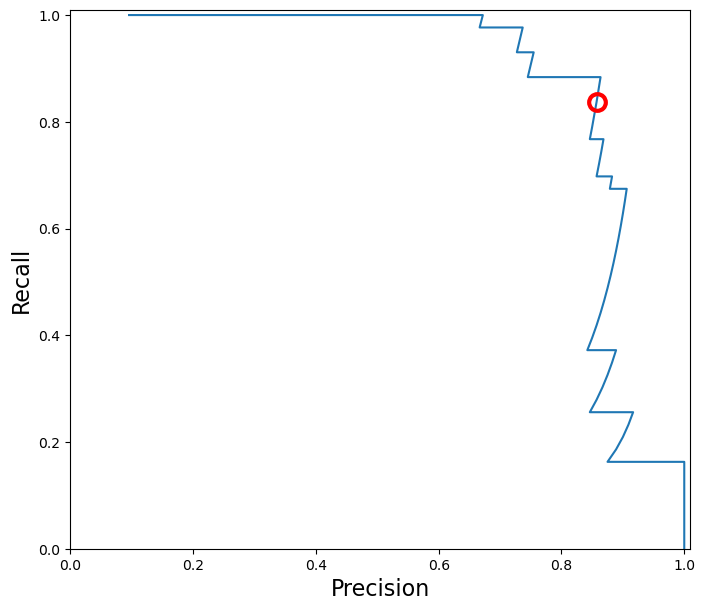

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(8, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

### ROC curves

X-axis: False Positive Rate

Y-axis: True Positive Rate

Top left corner -> The 'ideal' point:
* False positive rate of zero
* True positive rate of one

'Steepness' of ROC curves important:
* Maximize true positive rate while minimizing the false positive rate

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


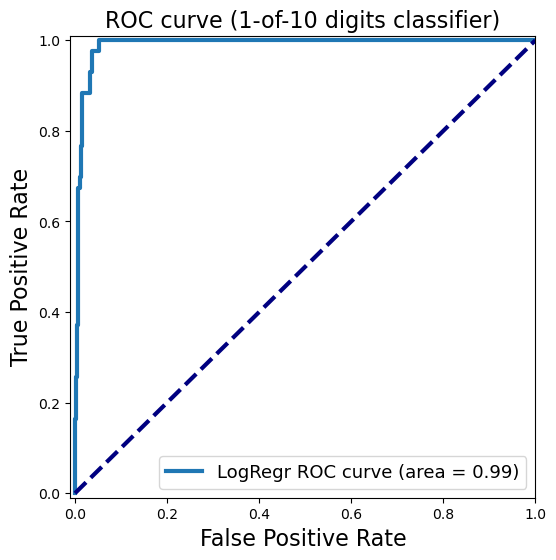

In [19]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

### Area-Under-Curve (AUC)

#### Advantages:
* Gives a single number of easy comparison
* Does not require specifying a decision threshold


#### Drawbacks
* As with other single-number metrics, AUC loses information, eg. about tradeoffs and the shape of the ROC curve
* This may be a factor to consider when e.g. wanting to compare the performance of classifiers with overlapping ROC curves


gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


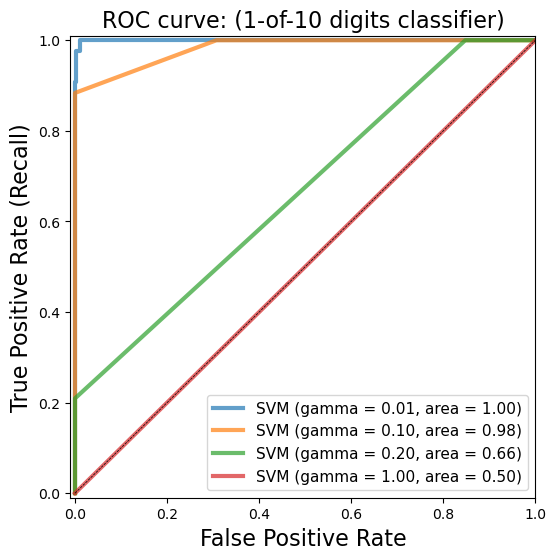

In [20]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure(figsize=(6, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)

plt.show()

### Multi-Class Evaluation

Multi-class evaluation is an extension of the binary case
* A collection of true vs predicted binary outcomes, one per class
* Confusion matrices are especially useful
* Classification report

Overall evaluation metrics are averages across classes
* But there are different ways to average multi-class results: we will cover these shortly
* The support (number of instances) for each class is important to consider, e.g. in case of imbalanced classes

Multi-label classification: each instance can have multiple labels

#### Evaluation measures for Multi-Class Elassification


#### Multi-class confusion matrix

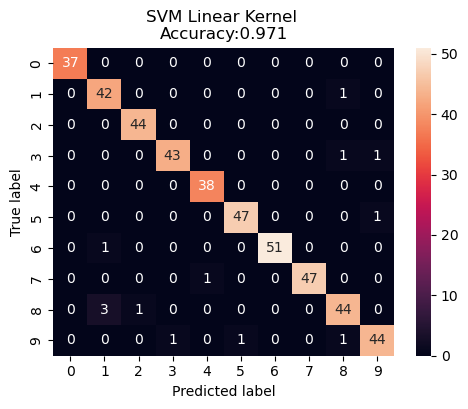

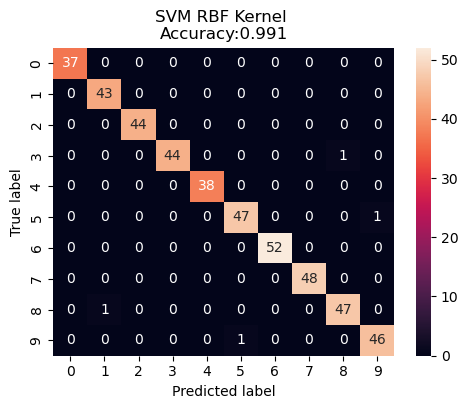

In [21]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [22]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

* Macro-average: Each class has equal weight
    1. Compute metric within each class
    2. Average resulting metrics across classes
<br/><br/>
* Micro-average: Each instance has equal weight
    * Largest classes have most influence
    1. Aggregate outcome across all classes
    2. Compute metric with aggregator outcomes
<br/><br/>
* If the classes have about the same number of instances, macro and micro-average will be about the same
<br/><br/>
* If some classes are much larger (more instances) than others, and you want to:
    * Weight your metric toward the largest ones , use-micro-averaging
    * Weight your metric toward the smallest ones, use macro-averaging
<br/><br/>
* If the micro-average is much lower than the macro-average then examine the larger classes for  poor metric performance
<br/><br/>
* If the macro-average is much lower than micro-average then examine the smaller classes for poor metric performance


In [23]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'.format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'.format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [24]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'.format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'.format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


### Regression evaluation metrics

* Typically R² Score is enough
    * Reminder: computes how well future instances will be predicted
    * Best possible is 1.0
    * Constant prediction score is 0.0
<br/><br/>
* Alternative metrics include:
    * mean_absolute_error (absolute difference of target and predicted values)
    * mean_squared_error (squared difference of target and predicted values)
    * median_absolute_error (robust to outliers)

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


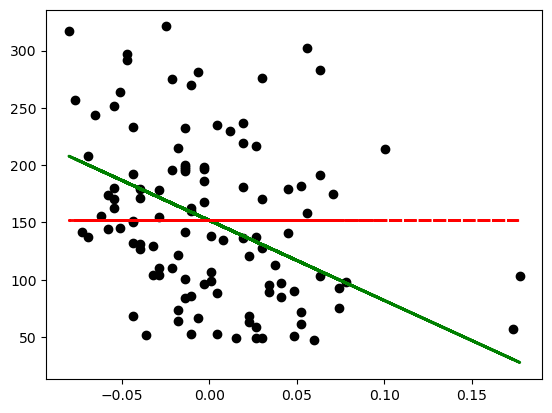

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', linewidth=2, label = 'dummy')

plt.show()

### Model selection using evaluation metrics

#### Cross-validation example

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


#### Evaluation metrics supported for model selection

In [28]:
from sklearn.metrics import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5273571428571429
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5510197246723912
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8920724461841022


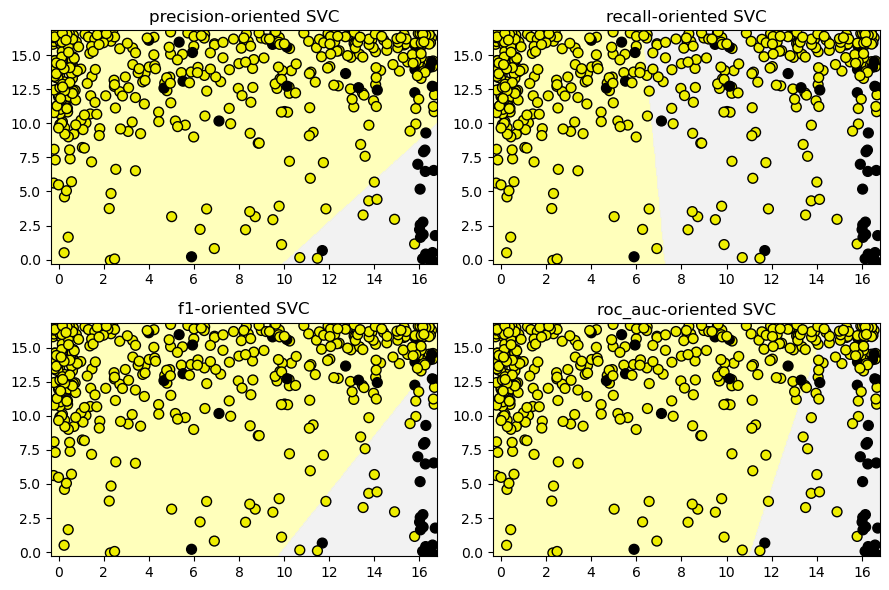

In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
      grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
      grid_clf_custom.fit(X_twovar_train, y_train)
      print('Grid best parameter (max. {0}): {1}'.format(eval_metric, grid_clf_custom.best_params_))
      print('Grid best score ({0}): {1}'.format(eval_metric, grid_clf_custom.best_score_))
      plt.subplots_adjust(wspace=0.3, hspace=0.3)
      plot_class_regions_for_classifier_subplot(
            grid_clf_custom, X_twovar_test, y_test, 
            None, None, None,  plt.subplot(2, 2, i+1)
      )
      plt.title(eval_metric+'-oriented SVC')

plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<Figure size 640x480 with 0 Axes>

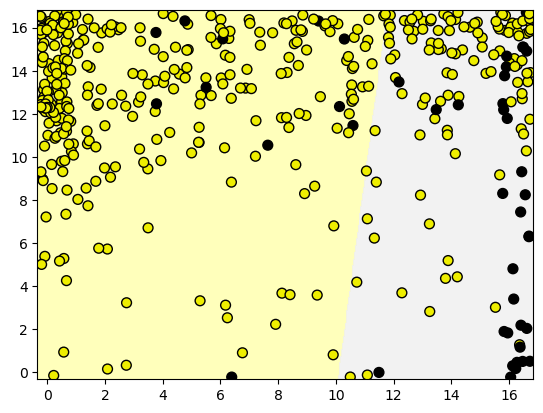

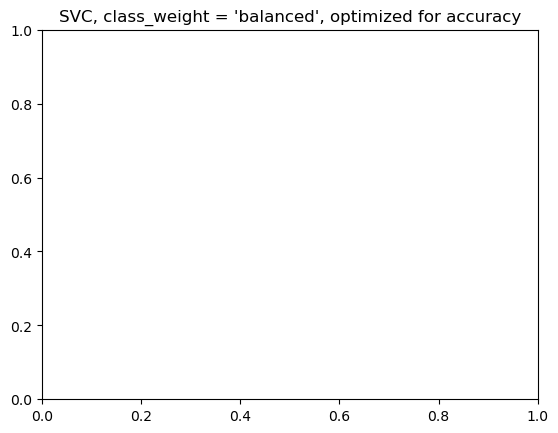

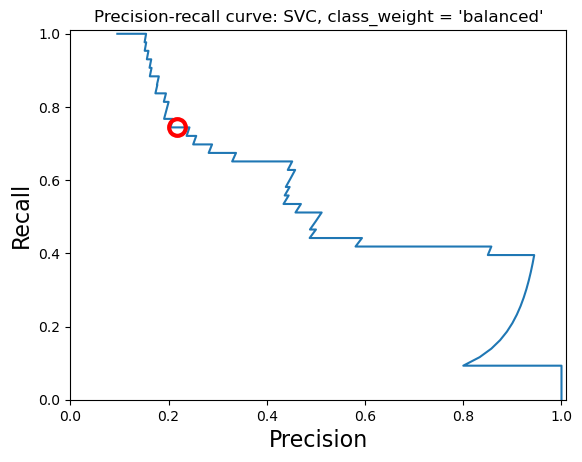

At zero threshold, precision: 0.22, recall: 0.74


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()


plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'.format(closest_zero_p, closest_zero_r))

### Training, Validation and Test Framework for Model Selection and Evaluation

Using only cross-validation or a test set to do model selection may lead to more subtle overfitting/optimistic generalization estimates. Instead use:
1. Training set (model building)
2. Validation se (model selection)
3. Test set (final evaluation)

In practice:
- Create an initial training/test split
- Do cross-validation on the training data for model /parameter selection
- Save the held-out set for final model evaluation

### Model Calibration

A calibrated model outputs prediction probabilities that are close to real-world observed probabilities. A machine learning model may also have calibration issues.

Binary classifier: Given an instance $x_i$ with 0/1 label $y_i$, a predictor $f(x_i)$ is calibrated IF:
* Across all the data points where the predictor predicts 'belongs to class y=1' with probability R%, the data points actually does belong to class 1 exactly R% of the time.

The predicted probability $p$ from the predictor matches the empirical probability. Mathematically:

For all $W = \{ x_i : f(x_i) \approx p \}$ (predicted probability)

$\mu_f(p) = E_{x_i \in W}[y_i] \approx p$

where $E[.]$ denotes expected value.

#### Calibration Importance

Many scenarios depend on having accurate prediction probabilities:
- Decision-making: need confidence/degree of risk.
- Computing expectations of important quantities, e.g. estimating expected clicks on a search result.
- Modular probability framework: all models in a large system 'speak' the common language of probability.

What scenarios may not require calibration ?
- Non-probabilistic frameworks.
- Relative prediction, e.g. ranking, using raw model prediction score.

Miscalibrated models are common in ML.

For estimators that don't have a `predict_proba` method, calibration is a way to get output probabilities.

#### Ensuring a predictor is calibrated

Treat the model like a 'black box': train a calibration function that learns to correct/improve the output prediction score of an existing predictor to turn it into a calibrated predictor.

A good calibration function should ideally be strictly monotonic (always increasing) to preserve the original prediction rankings:
- If the raw (non-probability) score for item A < item > B, then we want prediction probability for item A < prediction probability for item B.

Widely used calibration methods include:
- Platt scaling (sigmoid calibration).
- Isotonic regression.

#### Platt Scaling

**Idea:** Map these uncalibrated scores $f(x)$ to probabilities by using a linear transformation followed by application of a logistic function:

$P(y=1|x) = {{1}\over{1 + exp(Af(x) + B)}}$

Tune A and B to maximize calibration accuracy (getting the reliability curve as close as possible to the line y = x in the plot).

Platt scaling is especially effective for maximum-margin methods such s SVMs or boosted trees that already tend to have sigmoidal distortion in their predicted probabilities.

#### Isotonic Regression

1. Plot the raw score prediction $f(x)$ of soft classifier against the actual fraction Y = 1 (empirical probability)
2. Perform isotonic regression to get $g$. Guarantees a (non-strictly) increasing function $g$.
3. Use $g \circ f = g(f(x))$ to produce calibrated probabilities from the raw scores $f(x)$.

#### Isotonic vs Platt

- Platt is restricted to using "S" sigmoid shape.
- Isotonic can fit any bias shape: It's a more powerful method, but prone to overfitting when data is scarce.

In [31]:
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=0)

# untrained model
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_clf, cv=3)
calibrated_clf.fit(X, y)
calibrated_clf.predict_proba([[-0.5, 0.5]])

array([[0.68536704, 0.31463296]])

In [32]:
# trained model

X_train, X_calib, y_train, y_calib = train_test_split(X, y, random_state=0)
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
calibrated_clf = CalibratedClassifierCV(estimator=base_clf, cv="prefit")
calibrated_clf.fit(X_calib, y_calib)
calibrated_clf.predict_proba([[-0.5, 0.5]])

array([[0.69123481, 0.30876519]])